In [222]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns
from sklearn.model_selection import KFold,GridSearchCV

In [223]:
df1 = pd.read_csv("archive/Train_Data.csv")
df1.head()


,age,sex,bmi,smoker,region,children,charges
0,21.000000,male,25.745000,no,northeast,2,3279.868550
1,36.976978,female,25.744165,yes,southeast,3,21454.494239
2,18.000000,male,30.030000,no,southeast,1,1720.353700
3,37.000000,male,30.676891,no,northeast,3,6801.437542
4,58.000000,male,32.010000,no,southeast,1,11946.625900


In [224]:
df1.isna().sum()

age         0
sex         0
bmi         0
smoker      0
region      0
children    0
charges     0
dtype: int64

In [225]:
df1.info()
# df1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3630 entries, 0 to 3629
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       3630 non-null   float64
 1   sex       3630 non-null   object 
 2   bmi       3630 non-null   float64
 3   smoker    3630 non-null   object 
 4   region    3630 non-null   object 
 5   children  3630 non-null   int64  
 6   charges   3630 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 198.6+ KB


In [226]:
encoder1 = LabelEncoder()

catagorical_columns = ['sex','smoker']
for i in catagorical_columns:
  df1[i] = encoder1.fit_transform(df1[i])


encoder2 = OneHotEncoder()
df1= pd.get_dummies(df1, columns=['region'])



In [227]:
df1.head()

,age,sex,bmi,smoker,children,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,21.000000,1,25.745000,0,2,3279.868550,True,False,False,False
1,36.976978,0,25.744165,1,3,21454.494239,False,False,True,False
2,18.000000,1,30.030000,0,1,1720.353700,False,False,True,False
3,37.000000,1,30.676891,0,3,6801.437542,True,False,False,False
4,58.000000,1,32.010000,0,1,11946.625900,False,False,True,False


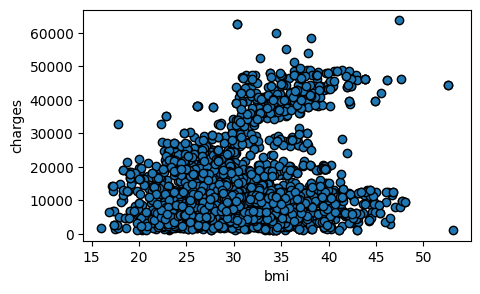

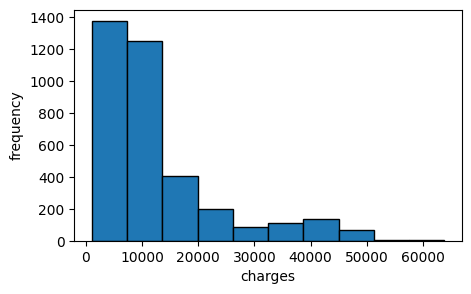

In [228]:
plt.figure(figsize=(5,3))
plt.scatter(df1['bmi'],df1['charges'],edgecolor='black')
plt.xlabel('bmi')
plt.ylabel('charges')
plt.show()

plt.figure(figsize=(5,3))
plt.hist(df1['charges'],bins=10,edgecolor='black')
plt.xlabel('charges')
plt.ylabel('frequency')
plt.show()

In [229]:
df1.corr()

,age,sex,bmi,smoker,children,charges,region_northeast,region_northwest,region_southeast,region_southwest
age,1.000000,-0.152745,0.143527,0.026564,-0.061076,0.299692,-0.022251,0.097243,0.048156,-0.128457
sex,-0.152745,1.000000,-0.011215,0.078318,0.147182,0.092703,0.106223,-0.180701,0.001615,0.077158
bmi,0.143527,-0.011215,1.000000,0.045921,-0.041996,0.211325,-0.037514,0.014488,0.070051,-0.051727
smoker,0.026564,0.078318,0.045921,1.000000,-0.183507,0.777175,0.056199,-0.034372,0.048327,-0.072273
children,-0.061076,0.147182,-0.041996,-0.183507,1.000000,-0.075089,-0.078339,-0.087854,0.068287,0.095720
charges,0.299692,0.092703,0.211325,0.777175,-0.075089,1.000000,0.112336,-0.043049,0.050719,-0.122019
region_northeast,-0.022251,0.106223,-0.037514,0.056199,-0.078339,0.112336,1.000000,-0.319576,-0.345378,-0.305286
region_northwest,0.097243,-0.180701,0.014488,-0.034372,-0.087854,-0.043049,-0.319576,1.000000,-0.362102,-0.320068
region_southeast,0.048156,0.001615,0.070051,0.048327,0.068287,0.050719,-0.345378,-0.362102,1.000000,-0.345910
region_southwest,-0.128457,0.077158,-0.051727,-0.072273,0.095720,-0.122019,-0.305286,-0.320068,-0.345910,1.000000


In [230]:
df1['age'] = df1['age'].round()
df1.head()

,age,sex,bmi,smoker,children,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,21.0,1,25.745000,0,2,3279.868550,True,False,False,False
1,37.0,0,25.744165,1,3,21454.494239,False,False,True,False
2,18.0,1,30.030000,0,1,1720.353700,False,False,True,False
3,37.0,1,30.676891,0,3,6801.437542,True,False,False,False
4,58.0,1,32.010000,0,1,11946.625900,False,False,True,False


In [231]:
scaler = MinMaxScaler()

df1[['age','bmi','children',]] = scaler.fit_transform(df1[['age','bmi','children']])


In [232]:
df1.head()

,age,sex,bmi,smoker,children,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,0.065217,1,0.263250,0,0.4,3279.868550,True,False,False,False
1,0.413043,0,0.263227,1,0.6,21454.494239,False,False,True,False
2,0.000000,1,0.378531,0,0.2,1720.353700,False,False,True,False
3,0.413043,1,0.395935,0,0.6,6801.437542,True,False,False,False
4,0.869565,1,0.431800,0,0.2,11946.625900,False,False,True,False


In [233]:
#Without K fold

lr = LinearRegression()
X = df1.drop('charges',axis=1)
y = df1['charges']

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)


mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)


rmse = np.sqrt(mse)
print('Root Mean Squared Error:', rmse)

print("Accuracy: ",metrics.r2_score(y_test,y_pred))



Mean Absolute Error: 3796.5552093202914
Mean Squared Error: 32206444.363242283
Root Mean Squared Error: 5675.072190134878
Accuracy:  0.7204632347550244


In [234]:
warnings.filterwarnings("ignore")
# After Kfold technique

X = df1.drop('charges',axis=1)
y = df1['charges']
n_splits = 7
n_repeats = 10

a, b, c, rc,r2 = [], [], [], [],[]


kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
for tr, te in kf.split(X):
    X_train, X_test = X.iloc[tr], X.iloc[te]
    y_train, y_test = y.iloc[tr], y.iloc[te]
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    b.append(mae)
    mse = mean_squared_error(y_test, y_pred, squared = False)
    c.append(mse)
    rmse = np.sqrt(mse)
    rc.append(rmse)
    acc=metrics.r2_score(y_test,y_pred)
    r2.append(acc)
mae, mse, rmse,accr =  np.mean(b), np.mean(c), np.mean(rc),np.mean(r2)
print("Simple K-Fold:")
print( "MAE: ",mae,"MSE: ",mse,"RMSE: ",rmse)
print("Accuracy: ",accr)



Simple K-Fold:
MAE:  3857.5970592628246 MSE:  5709.217268695979 RMSE:  75.54334292570358
Accuracy:  0.7159627731348931


In [235]:
#knn without hyperparameter tuning
X=df1.drop('charges',axis=1)
y=df1['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
knn = KNeighborsRegressor()
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print("Accuracy: ",metrics.r2_score(y_test,y_pred))

mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)


mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)


rmse = np.sqrt(mse)
print('Root Mean Squared Error:', rmse)

Accuracy:  0.8528688956675616
Mean Absolute Error: 1959.4478322399355
Mean Squared Error: 16951508.04808222
Root Mean Squared Error: 4117.22091319888


In [236]:
#Knn after hyperparameter tuning
X = df1.drop('charges', axis=1)
y = df1['charges']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}


knn = KNeighborsRegressor()


grid_search = GridSearchCV(knn, param_grid, cv=KFold(n_splits=7, shuffle=True, random_state=42), scoring='r2', n_jobs=-1)


grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)


best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)


mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Metrics with Best KNN Model:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"Accuracy: {r2:.2f}")


Best Parameters: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
Metrics with Best KNN Model:
MAE: 1397.24
MSE: 12835115.23
RMSE: 3582.61
Accuracy: 0.89


In [237]:
Rf = RandomForestRegressor()

X = df1.drop('charges',axis=1)
y = df1['charges']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

Rf.fit(X_train,y_train)

y_pred = Rf.predict(X_test)

print("Accuracy: ",metrics.r2_score(y_test,y_pred))

mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)


mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)


rmse = np.sqrt(mse)
print('Root Mean Squared Error:', rmse)


Accuracy:  0.9035176126804494
Mean Absolute Error: 1471.5366674387558
Mean Squared Error: 11116085.701702712
Root Mean Squared Error: 3334.079438421153
